In [1]:
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter

global static #增加一個全域變數用來紀錄統計結果
static={}

In [2]:
import _thread
import time
import threading

In [3]:
with open('./wordlen.txt') as f: #打開我們要比對的字典檔
    wordlen = f.read().split('\n')
del wordlen[0]
wordlen[:10] 

['C', 'C++', 'C#', 'PYTHON', 'JAVA', 'JAVASCRIPT', 'PHP', 'HTML', 'SQL', 'CSS']

In [4]:
def inner_word(url): #一個用來分析內頁的function
    
    inner = requests.get(url)  #用get連到網頁
    innersoup = BeautifulSoup(inner.text, 'lxml')  #放到BeautifulSoup解析
    innerselect2 = str(innersoup.select_one('div.job-detail-box > dl')).upper()  
    #找到可能會出現找尋目標的區塊將全部英文變大寫
    innerselect = str(innersoup.select_one('div.> p')).upper()
    #同上
    lan1=re.findall('[A-Z]+[+#?]*' , innerselect)
    #用正規法抓出每個英文單字
    lan2=re.findall('[A-Z]+[+#?]*' , innerselect2)
    #同上 第二區塊的
    lan1.extend(lan2)
    #將兩個list合併
    if 'HTML#' in lan1:
        lan1.remove('HTML#')
    #排除調內文出現的雜訊
    if 'HTML?' in lan1:
        lan1.remove('HTML?')
    #雜訊2
    lan1 = list(set(lan1))
    #清除調list內重複的部份
    
    for i in lan1: #將每個元素都跑過 內容會顯示在i
        if i in wordlen: #如果list裡面的字有出現在我們的字典檔中
            if i in static:  #如果static已經有這個字 就在value+1
                static[i] += 1
            else:
                static[i] = 1 #如果static統計的字典檔還沒有這個字 就新增
    return static


In [5]:
def page(url):  #這是用來抓出搜尋畫面中所有的case連結
    res = requests.get(url)
    time.sleep(0.5)
    soup = BeautifulSoup(res.text, 'lxml')
    time.sleep(0.5)
    links = soup.select('li.title > a')
    for link in links:
        inner_word(str(link['href']))#把取得的連結丟到上面inner_word function去解析
        print("%s" %  link['href'])
        print("=" * 50)
    return static
    

In [6]:
# https://www.104.com.tw/jobbank/joblist/joblist.cfm?jobsource=104_bank1&ro=0&jobcat=2007000000&order=2&asc=0&page=1'
class MyClass (threading.Thread): #多線程處理
    def __init__(self,number):
        threading.Thread.__init__(self)
        self.number=number
    def run(self): 
        print(('start'+str(self.number)+' '))
        page('https://www.518.com.tw/job-index-P-'+str(self.number)+'.html?i=1&am=1&ab=2032001,2032002,') 
        print(('finish'+str(self.number)+' '))
        time.sleep(0.5)

In [7]:
threads=[]
for i in range(1,54+1): 
    Thread=MyClass(i)
    threads.append(Thread)
for thread in threads:
    thread.start()
for thread in threads:
    thread.join()

start1 
start2 
start3 
start4 start5 

start6 
start7 
start8 
start9 
start10 
start11 
start12 start13 
start14 start15 
start16 
start17 


start19 
start20 
start21 
start22 
start23 
start24 
start18 
start26 
start27 
start25 
start29 
start30 
start31 
start32 
start33 start28 
start34 

start35 
start36 
start38 
start37 
start39 
start40 
start41 
start42 
start43 start44 

start45 
start46 
start47 
start48 
start49 start50 

start51 
start53 start52 

start54 
https://www.518.com.tw/電腦維修工程師-新北市-新店區-job-1230734.html?kw=&pi=7
https://www.518.com.tw/電腦門市-儲備幹部-台中市-太平區-job-1048289.html?kw=&pi=45https://www.518.com.tw/高級 資深資料庫程式設計師(研發二部)-台北市-內湖區-job-1329321.html?kw=&pi=3

https://www.518.com.tw/維修工程師-彰化縣-彰化市-job-103274.html?kw=&pi=46
https://www.518.com.tw/專案執行專員-台北市-內湖區-job-1349315.html?kw=&pi=3
https://www.518.com.tw/徵工程師- 晚班-台北市-中山區-job-1337287.html?kw=&pi=15
https://www.518.com.tw/川流資訊-Wordpress網站程式工程師(不必接洽客戶,專心設計)(官網web5000.com.tw)-台中市-西屯區-job-1181379.html?kw=&pi=33
https://

https://www.518.com.tw/Internet程式設計師-桃園市-龜山區-job-1079169.html?kw=&pi=13https://www.518.com.tw/網路軟體工程師-基隆市-中正區-job-1349708.html?kw=&pi=18
https://www.518.com.tw/網路行銷-新北市-深坑區-job-334925.html?kw=&pi=50
https://www.518.com.tw/GPS、GIS程式開發人員-台北市-內湖區-job-1036908.html?kw=&pi=16
https://www.518.com.tw/手機app程式設計工程師-新北市-樹林區-job-986584.html?kw=&pi=4
https://www.518.com.tw/TIPTOP項目經理-新北市-深坑區-job-1280994.html?kw=&pi=54==================================================

https://www.518.com.tw/Windows AP工程師-台中市-南屯區-job-671951.html?kw=&pi=40

https://www.518.com.tw/程式設計師-新北市-樹林區-job-381205.html?kw=&pi=51
==================================================https://www.518.com.tw/軟體工程師-台中市-大雅區-job-1070247.html?kw=&pi=26==================================================


https://www.518.com.tw/駐點工程師-台北市-全區-job-932430.html?kw=&pi=27
https://www.518.com.tw/助理工程師-台北市-松山區-job-1037036.html?kw=&pi=10https://www.518.com.tw/微風集團_資訊長期晚班工讀生(本館.場站.南京.松高.信義)-台北市-松山區-job-1111330.html?kw=&pi=43


https://www.518.com.tw/

https://www.518.com.tw/軟體工程師-台中市-大里區-job-1304747.html?kw=&pi=17https://www.518.com.tw/網頁設計師[學生實習]-台北市-大安區-job-1236678.html?kw=&pi=2


https://www.518.com.tw/台中業務專員-台中市-南屯區-job-1247735.html?kw=&pi=47
https://www.518.com.tw/系統客服測試人員-台北市-信義區-job-767716.html?kw=&pi=36https://www.518.com.tw/資管專員-台北市-內湖區-job-1130157.html?kw=&pi=14


https://www.518.com.tw/Flash Builder 設計師-桃園市-中壢區-job-763179.html?kw=&pi=38
https://www.518.com.tw/程式資訊助理人員-台北市-北投區-job-1137005.html?kw=&pi=45
https://www.518.com.tw/資訊服務人員-台北市-信義區-job-210566.html?kw=&pi=42https://www.518.com.tw/後端工程師-高雄市-鳳山區-job-1242080.html?kw=&pi=50
https://www.518.com.tw/IT專案主管-台北市-松山區-job-1111385.html?kw=&pi=43

==================================================https://www.518.com.tw/網路美工助理-台南市-東區-job-1200435.html?kw=&pi=9https://www.518.com.tw/內勤-行政,企劃,資訊人員-台北市-大安區-job-1275394.html?kw=&pi=1

https://www.518.com.tw/電話行銷人員-彰化縣-彰化市-job-1312401.html?kw=&pi=33
https://www.518.com.tw/資深工程師-新北市-汐止區-job-1026170.html?kw=&pi=46https://www.518.com.tw/F

https://www.518.com.tw/台北內湖-IT資訊人員-台北市-內湖區-job-1281340.html?kw=&pi=15
https://www.518.com.tw/設備操作員-台南市-仁德區-job-947341.html?kw=&pi=53
https://www.518.com.tw/知名電信-國際NOC機房維運助理-台北市-中正區-job-1350964.html?kw=&pi=4
https://www.518.com.tw/程式設計師-台中市-西區-job-1144867.html?kw=&pi=51
https://www.518.com.tw/物聯網 - JAVA工程師-桃園市-龜山區-job-1296462.html?kw=&pi=13
https://www.518.com.tw/Internet程式設計師-台北市-士林區-job-996127.html?kw=&pi=52
https://www.518.com.tw/Internet 資深程式設計師-新竹縣-竹北市-job-1071054.html?kw=&pi=6
https://www.518.com.tw/軟體工程師-桃園市-中壢區-job-965162.html?kw=&pi=5
https://www.518.com.tw/App開發工程師(iOS Android)-台中市-西區-job-1242885.html?kw=&pi=27
https://www.518.com.tw/美編 懂網路-台北市-士林區-job-947355.html?kw=&pi=11
https://www.518.com.tw/網站前端工程師-新竹市-香山區-job-1092993.html?kw=&pi=29
https://www.518.com.tw/D03 電商部-WEB工程師 APP工程師-高雄市-鼓山區-job-1153703.html?kw=&pi=39
https://www.518.com.tw/IT資訊人員-台中市-大里區-job-1219588.html?kw=&pi=22
https://www.518.com.tw/門市 店員 專櫃人員-台中市-西屯區-job-1227717.html?kw=&pi=28
https://www.518.com.tw/網管工程師

https://www.518.com.tw/急徵機上盒數位化工程-新北市-板橋區-job-1262625.html?kw=&pi=32
https://www.518.com.tw/軟體工程師-台北市-大安區-job-666084.html?kw=&pi=34
https://www.518.com.tw/網拍小幫手工讀計時人員  早班10-18-新北市-汐止區-job-1000915.html?kw=&pi=21
https://www.518.com.tw/IT網管工程師-台中市-西區-job-1348801.html?kw=&pi=5
https://www.518.com.tw/iOS軟體工程師-新竹市-全區-job-851201.html?kw=&pi=51
https://www.518.com.tw/iOS程式設計師-台北市-南港區-job-919986.html?kw=&pi=26
https://www.518.com.tw/技術部_PHP資深軟體工程師-台北市-松山區-job-1167388.html?kw=&pi=20
https://www.518.com.tw/軟體開發工程師-新北市-板橋區-job-1318860.html?kw=&pi=15
https://www.518.com.tw/業務助理人員-新北市-汐止區-job-27298.html?kw=&pi=31
https://www.518.com.tw/世大運 資通處設備組 行政專員-台北市-松山區-job-1348119.html?kw=&pi=8
https://www.518.com.tw/程式設計師-台北市-松山區-job-572024.html?kw=&pi=46
https://www.518.com.tw/自動控制電機技術人員(無經驗可,有經驗者佳)-台中市-北屯區-job-114384.html?kw=&pi=33
https://www.518.com.tw/網頁前端設計師-新北市-蘆洲區-job-1338689.html?kw=&pi=20
https://www.518.com.tw/網拍資訊助理-彰化縣-彰化市-job-1140339.html?kw=&pi=1
https://www.518.com.tw/Internet軟體工程師-台北市-南港區-j

https://www.518.com.tw/APP程式設計師-南投縣-南投市-job-913570.html?kw=&pi=32
https://www.518.com.tw/遊戲伺服端程式設計師-台中市-北區-job-876597.html?kw=&pi=6
https://www.518.com.tw/台北市南港區 本土壽險公司JAVA工程師-台北市-南港區-job-1231166.html?kw=&pi=11
https://www.518.com.tw/客戶服務人員-台南市-安平區-job-251698.html?kw=&pi=28
https://www.518.com.tw/伺服器及網路-駐點維護工程師 (台北)-台北市-內湖區-job-365447.html?kw=&pi=53
https://www.518.com.tw/急徵網拍小幫手 熟電腦先錄取 近逢甲-台中市-西屯區-job-1132751.html?kw=&pi=24
https://www.518.com.tw/資訊工程師-新北市-新莊區-job-621958.html?kw=&pi=35
https://www.518.com.tw/.NET 技術主管(台中)-台中市-南屯區-job-1355023.html?kw=&pi=3
https://www.518.com.tw/設備技術工程主管-台中市-西區-job-1256498.html?kw=&pi=40
https://www.518.com.tw/BA系統設計工程師-台北市-內湖區-job-716116.html?kw=&pi=16
https://www.518.com.tw/大數據資料分析師-台中市-西屯區-job-1280782.html?kw=&pi=49
https://www.518.com.tw/專案助理-台北市-中山區-job-681858.html?kw=&pi=25
https://www.518.com.tw/維修工程師-新北市-淡水區-job-202994.html?kw=&pi=21
https://www.518.com.tw/技術工程師-新北市-八里區-job-1061720.html?kw=&pi=28
https://www.518.com.tw/大專學士工讀生區域業務3年以上經驗-桃園市-中壢區

https://www.518.com.tw/網站程式設計-兼職-case by case-雲林縣-北港鎮-job-1196060.html?kw=&pi=28
https://www.518.com.tw/Internet程式設計師-台南市-南區-job-1041082.html?kw=&pi=4
https://www.518.com.tw/繪圖人員-台中市-北區-job-942365.html?kw=&pi=30
https://www.518.com.tw/App軟體工程師-新北市-五股區-job-929026.html?kw=&pi=51
https://www.518.com.tw/資訊人員-台北市-中山區-job-616299.html?kw=&pi=31
https://www.518.com.tw/(正職)遊戲公司徵Node.js 研發工程師TPL1-新北市-土城區-job-1331863.html?kw=&pi=15
https://www.518.com.tw/資訊暨教育顧問-台北市-中山區-job-86184.html?kw=&pi=32
https://www.518.com.tw/Drupal 網站開發助理工程師(後端)-台北市-大安區-job-1174327.html?kw=&pi=5
https://www.518.com.tw/伺服器網路管理及維護工程師(桃園區)-桃園市-全區-job-365452.html?kw=&pi=53
https://www.518.com.tw/Senior C .net Engineer-新北市-土城區-job-1198440.html?kw=&pi=45
https://www.518.com.tw/行政助理-新北市-板橋區-job-104498.html?kw=&pi=27
https://www.518.com.tw/夜校工讀生-桃園市-八德區-job-263709.html?kw=&pi=48
https://www.518.com.tw/資訊助理人員 (實習生亦可)-新北市-林口區-job-1223414.html?kw=&pi=4
https://www.518.com.tw/網頁全端工程師-台北市-中正區-job-1273170.html?kw=&pi=30
https://www.51

https://www.518.com.tw/徵正職遊戲產業Unity3D 研發工程師TPL1-新北市-土城區-job-1328331.html?kw=&pi=15
https://www.518.com.tw/開發工程師-新北市-汐止區-job-265598.html?kw=&pi=38
https://www.518.com.tw/網頁開發工程師-宜蘭縣-宜蘭市-job-1089894.html?kw=&pi=53
https://www.518.com.tw/Lotus Domino 系統工程師-台北市-中正區-job-959702.html?kw=&pi=52https://www.518.com.tw/資訊中心-MIS資訊助理工程師-台中市-烏日區-job-1122757.html?kw=&pi=23
https://www.518.com.tw/電腦維修工程師-台中市-北區-job-72353.html?kw=&pi=49

https://www.518.com.tw/Visual Foxpro程式設計師-台北市-松山區-job-695230.html?kw=&pi=37https://www.518.com.tw/網拍行銷企劃-新竹縣-竹北市-job-558678.html?kw=&pi=27
https://www.518.com.tw/影像軟體工程師-新竹縣-竹北市-job-946478.html?kw=&pi=48
==================================================https://www.518.com.tw/PHP工程師-台中市-西屯區-job-823283.html?kw=&pi=50

https://www.518.com.tw/iOS Android APP工程師-台南市-北區-job-1024195.html?kw=&pi=9https://www.518.com.tw/3C配件銷售門市工讀生-台中市-西屯區-job-1227718.html?kw=&pi=51



https://www.518.com.tw/其它資訊專業人員-台北市-士林區-job-1268876.html?kw=&pi=26
https://www.518.com.tw/網頁 手機程式開發工程師(APP We

https://www.518.com.tw/網路助理工程師-台北市-信義區-job-883357.html?kw=&pi=53

https://www.518.com.tw/產品經理Product Manager-台北市-松山區-job-1290693.html?kw=&pi=27
https://www.518.com.tw/軟體工程師-新北市-三重區-job-646107.html?kw=&pi=31
https://www.518.com.tw/系統軟體設計工程師-台北市-南港區-job-858280.html?kw=&pi=39
https://www.518.com.tw/網路行銷人員 豐原分店-台中市-豐原區-job-827764.html?kw=&pi=5https://www.518.com.tw/專利工程師-苗栗縣-竹南鎮-job-1174286.html?kw=&pi=21


https://www.518.com.tw/PHP程式設計師-嘉義市-西區-job-967404.html?kw=&pi=30
https://www.518.com.tw/工程師-新北市-永和區-job-1250918.html?kw=&pi=36
https://www.518.com.tw/2017演員培訓計畫(D)-台北市-信義區-job-1351601.html?kw=&pi=4
https://www.518.com.tw/軟體業務客服工程師(台北)-新北市-三重區-job-826280.html?kw=&pi=29
https://www.518.com.tw/專案助理, 專案特助-台北市-中山區-job-192492.html?kw=&pi=3
https://www.518.com.tw/iOS APP開發-新北市-蘆洲區-job-1018069.html?kw=&pi=20https://www.518.com.tw/Android App開發工程師-台北市-內湖區-job-1293108.html?kw=&pi=13

https://www.518.com.tw/unity工程師-高雄市-前鎮區-job-1344470.html?kw=&pi=17
https://www.518.com.tw/GUI開發設計工程師-台中市-大雅區-job-9

https://www.518.com.tw/應用軟體設計工程師-台北市-南港區-job-858286.html?kw=&pi=39https://www.518.com.tw/Internet系統工程師-台北市-松山區-job-1073312.html?kw=&pi=10

==================================================https://www.518.com.tw/軟體工程師-桃園市-蘆竹區-job-1312935.html?kw=&pi=50https://www.518.com.tw/資訊助理-台中市-西區-job-878479.html?kw=&pi=54https://www.518.com.tw/APP開發工程師-台南市-仁德區-job-1178123.html?kw=&pi=24



https://www.518.com.tw/Embedded Linux 韌體設計工程師-台北市-內湖區-job-235306.html?kw=&pi=33https://www.518.com.tw/機械繪圖 設計-屏東縣-屏東市-job-873020.html?kw=&pi=48

https://www.518.com.tw/資訊部助理(兼職)-台北市-大安區-job-1236657.html?kw=&pi=1
https://www.518.com.tw/Unity VR應用開發工程師-廣東省-清遠市-job-1286525.html?kw=&pi=9
https://www.518.com.tw/韌體 硬體開發人員-台北市-內湖區-job-776742.html?kw=&pi=46https://www.518.com.tw/網拍助手-台北市-松山區-job-908676.html?kw=&pi=52

https://www.518.com.tw/Web Developer   Programmer   程式設計師-台北市-全區-job-1111122.html?kw=&pi=19==================================================https://www.518.com.tw/APP軟體開發工程師[台中]-台中市-南區-job-750628.html?kw

https://www.518.com.tw/電腦維修工程師 _(全職)-台中市-北屯區-job-64055.html?kw=&pi=50
https://www.518.com.tw/購物網站管理人員-高雄市-仁武區-job-986664.html?kw=&pi=3
https://www.518.com.tw/軟體業務-彰化縣-員林市-job-1225759.html?kw=&pi=20
https://www.518.com.tw/EDM軟體設計工程師-台北市-內湖區-job-1293099.html?kw=&pi=13https://www.518.com.tw/專案經理(CRM系統專案導入)-台北市-松山區-job-96549.html?kw=&pi=27

https://www.518.com.tw/網頁設計師-台南市-永康區-job-1077979.html?kw=&pi=49
https://www.518.com.tw/Java工程師-金融科技服務事業處(技術4組)-台北市-中山區-job-1219061.html?kw=&pi=41
https://www.518.com.tw/中區工程部(助理工程師)-台中市-北區-job-1351102.html?kw=&pi=4
https://www.518.com.tw/電腦系統工程師-台北市-內湖區-job-852516.html?kw=&pi=38
https://www.518.com.tw/全端工程師 (Full Stack)-新北市-新莊區-job-1198757.html?kw=&pi=45
https://www.518.com.tw/系統工程師-台中市-大雅區-job-767465.html?kw=&pi=32==================================================

https://www.518.com.tw/(資深) PHP工程師-台北市-中山區-job-974471.html?kw=&pi=30https://www.518.com.tw/電腦軟體工程師-台南市-南區-job-1259098.html?kw=&pi=26

https://www.518.com.tw/美編網管人員(彰化店 桃園店)-彰化縣-大村鄉-job-10786

https://www.518.com.tw/軟體工程師-新北市-新莊區-job-683743.html?kw=&pi=12

http://case.518.com.tw/casepage-detail-123802.html?from=518&a_id=2183https://www.518.com.tw/(中科)自動化機械設備-軟體設計工程師(全職代徵)-台中市-后里區-job-1342732.html?kw=&pi=7

https://www.518.com.tw/網路業務人員-台中市-北屯區-job-1331184.html?kw=&pi=42
https://www.518.com.tw/資訊助理-台中市-南屯區-job-789178.html?kw=&pi=31
http://case.518.com.tw/casepage-detail-124820.html?from=518&a_id=2183
https://www.518.com.tw/軟體專案主管 軟體工程師-台北市-中山區-job-1279536.html?kw=&pi=26https://www.518.com.tw/ANDROID   IOS-工程師-台中市-大雅區-job-767888.html?kw=&pi=33https://www.518.com.tw/電腦工程師-桃園市-桃園區-job-620702.html?kw=&pi=22https://www.518.com.tw/前端工程師 (Frontend)-新北市-新莊區-job-225143.html?kw=&pi=45https://www.518.com.tw/軟體設計工程師-台中市-北區-job-856707.html?kw=&pi=52https://www.518.com.tw/MIS工程師 專員-新北市-汐止區-job-1333868.html?kw=&pi=11








https://www.518.com.tw/.NET 軟體工程師(台中)-台中市-南屯區-job-1355024.html?kw=&pi=5https://www.518.com.tw/資安顧問-台北市-中山區-job-507933.html?kw=&pi=27
https://www.518.com.tw/軟體工程師-新北市-三重

https://www.518.com.tw/系統客服專員-台中市-西區-job-1157464.html?kw=&pi=36https://www.518.com.tw/網路平台管理-新北市-泰山區-job-794788.html?kw=&pi=53https://www.518.com.tw/軟體設計工程師-新北市-新莊區-job-994205.html?kw=&pi=44==================================================


https://www.518.com.tw/資訊專員-台北市-中山區-job-292584.html?kw=&pi=25


https://www.518.com.tw/Internet PHP 網頁工程師-台北市-中正區-job-959698.html?kw=&pi=39

==================================================finish53 

https://www.518.com.tw/初 高階 Android 前端工程師-台北市-內湖區-job-1171550.html?kw=&pi=30https://www.518.com.tw/前端工程師-台北市-內湖區-job-1276967.html?kw=&pi=13

https://www.518.com.tw/行政助理或資訊助理-台中市-西區-job-679485.html?kw=&pi=52
https://www.518.com.tw/MIS資訊人員-苗栗縣-後龍鎮-job-987288.html?kw=&pi=49
http://case.518.com.tw/casepage-detail-124817.html?from=518&a_id=2183
https://www.518.com.tw/網路佈線半技師、學徒-台北市-全區-job-445173.html?kw=&pi=24
https://www.518.com.tw/網路系統工程師-商軟高雄-高雄市-前鎮區-job-1219032.html?kw=&pi=41
https://www.518.com.tw/電子商務網站開發助理工程師  熟PHP或ASP.net-台北市-信義區-job-226098.html?

https://www.518.com.tw/SEO工程師-台北市-內湖區-job-1325847.html?kw=&pi=19
https://www.518.com.tw/ERP軟體程式設計師-高雄市-左營區-job-322232.html?kw=&pi=3==================================================

https://www.518.com.tw/Node.js 工程師-台北總處-台北市-中山區-job-1327702.html?kw=&pi=17
https://www.518.com.tw/系統程式設計師[台北]-新北市-板橋區-job-697318.html?kw=&pi=29
https://www.518.com.tw/電腦維修工程師(羅東分校)-宜蘭縣-羅東鎮-job-1057581.html?kw=&pi=42
https://www.518.com.tw/Operation Specialist-台北市-內湖區-job-1235132.html?kw=&pi=12
https://www.518.com.tw/軟體設計工程師-新北市-新店區-job-1176996.html?kw=&pi=6
http://case.518.com.tw/casepage-detail-124809.html?from=518&a_id=2183
finish1 
https://www.518.com.tw/外務人員-桃園市-桃園區-job-657793.html?kw=&pi=31
https://www.518.com.tw/軟體工程師-台南市-佳里區-job-740881.html?kw=&pi=44
https://www.518.com.tw/網管資料庫人員-台北市-松山區-job-1283437.html?kw=&pi=5
https://www.518.com.tw/資訊系統工程師-新北市-新莊區-job-909707.html?kw=&pi=43
https://www.518.com.tw/軟體工程師-新北市-新店區-job-596217.html?kw=&pi=39
https://www.518.com.tw/安卓刷機人員-高雄市-鳳山區-job-921760.html?kw=&pi

http://case.518.com.tw/casepage-detail-124767.html?from=518&a_id=2183
https://www.518.com.tw/數位機上盒工程師(基隆)-基隆市-七堵區-job-1230372.html?kw=&pi=15
http://case.518.com.tw/casepage-detail-123910.html?from=518&a_id=2183
https://www.518.com.tw/PHP工程師-台北市-信義區-job-1006775.html?kw=&pi=11
http://case.518.com.tw/casepage-detail-124480.html?from=518&a_id=2183https://www.518.com.tw/網頁設計-台中市-南屯區-job-1190303.html?kw=&pi=27

http://case.518.com.tw/casepage-detail-123640.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-124109.html?from=518&a_id=2183http://case.518.com.tw/casepage-detail-123663.html?from=518&a_id=2183

https://www.518.com.tw/Internet程式設計師-高雄市-全區-job-1165080.html?kw=&pi=24
https://www.518.com.tw/程式設計師-南投縣-南投市-job-422710.html?kw=&pi=35
https://www.518.com.tw/System Engineer Specialist-台北市-內湖區-job-1170751.html?kw=&pi=12http://case.518.com.tw/casepage-detail-122940.html?from=518&a_id=2183

http://case.518.com.tw/casepage-detail-122788.html?from=518&a_id=2183
https://www.518.com.tw

http://case.518.com.tw/casepage-detail-124165.html?from=518&a_id=2183
finish21 
https://www.518.com.tw/PHP 軟體工程師-台中市-南屯區-job-671931.html?kw=&pi=39
https://www.518.com.tw/網站後端工程師-台北市-內湖區-job-763477.html?kw=&pi=47https://www.518.com.tw/SEO網站企劃專員-台中市-北區-job-1350565.html?kw=&pi=10

https://www.518.com.tw/集團公司 徵求jave工程師 具大型開發經驗者佳mk-台北市-內湖區-job-1253688.html?kw=&pi=7https://www.518.com.tw/駐點機房OP人員(內湖)-台北市-內湖區-job-929010.html?kw=&pi=43
https://www.518.com.tw/網路資訊管理人員-台北市-中正區-job-1014863.html?kw=&pi=36

==================================================http://case.518.com.tw/casepage-detail-122939.html?from=518&a_id=2183

http://case.518.com.tw/casepage-detail-124277.html?from=518&a_id=2183http://case.518.com.tw/casepage-detail-124210.html?from=518&a_id=2183


finish18 finish20 

https://www.518.com.tw/機房系統工程師-台北市-內湖區-job-1050255.html?kw=&pi=40https://www.518.com.tw/SEO Specialist-台北市-內湖區-job-1325785.html?kw=&pi=19
https://www.518.com.tw/資訊專案工程師-台北市-南港區-job-949257.html?kw=&pi=17

http://case.51

https://www.518.com.tw/Android Developer-高雄市-前鎮區-job-1329437.html?kw=&pi=12http://case.518.com.tw/casepage-detail-124518.html?from=518&a_id=2183
finish13 
http://case.518.com.tw/casepage-detail-124574.html?from=518&a_id=2183http://case.518.com.tw/casepage-detail-122675.html?from=518&a_id=2183http://case.518.com.tw/casepage-detail-124337.html?from=518&a_id=2183


finish33 

finish11 
http://case.518.com.tw/casepage-detail-123396.html?from=518&a_id=2183
finish35 
http://case.518.com.tw/casepage-detail-122631.html?from=518&a_id=2183
finish48 
http://case.518.com.tw/casepage-detail-124731.html?from=518&a_id=2183
==================================================http://case.518.com.tw/casepage-detail-123109.html?from=518&a_id=2183
==================================================http://case.518.com.tw/casepage-detail-122574.html?from=518&a_id=2183


finish49 
http://case.518.com.tw/casepage-detail-123370.html?from=518&a_id=2183
http://case.518.com.tw/casepage-detail-123158.html?from=518&a_

In [8]:
static
#結果

{'C': 125,
 'C#': 106,
 'C++': 126,
 'CSS': 138,
 'DELPHI': 4,
 'DNS': 13,
 'FTP': 7,
 'HTML': 205,
 'JAVA': 203,
 'JAVASCRIPT': 69,
 'MYSQL': 193,
 'PERL': 6,
 'PHP': 172,
 'PYTHON': 9,
 'R': 3,
 'RUBY': 3,
 'SQL': 168,
 'SWIFT': 7}

In [9]:
# sorted(static.items(),key=lambda item:

In [10]:
dictlanguage= sorted(static.items(), key=lambda d:d[1],reverse=True)
dictlanguage


[('HTML', 205),
 ('JAVA', 203),
 ('MYSQL', 193),
 ('PHP', 172),
 ('SQL', 168),
 ('CSS', 138),
 ('C++', 126),
 ('C', 125),
 ('C#', 106),
 ('JAVASCRIPT', 69),
 ('DNS', 13),
 ('PYTHON', 9),
 ('SWIFT', 7),
 ('FTP', 7),
 ('PERL', 6),
 ('DELPHI', 4),
 ('R', 3),
 ('RUBY', 3)]

In [12]:
# import numpy as np
# import pylab as pl
 
# # make an array of random numbers with a gaussian distribution with
# # mean = 5.0
# # rms = 3.0
# # number of points = 1000
# data = dictlanguage.values()
 
# # make a histogram of the data array
# pl.hist(data)
 
# # make plot labels
# pl.xlabel('data')
# pl.show()

In [23]:
type(dictlanguage)

list

In [32]:
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt

language = OrderedDict(dictlanguage)
language

OrderedDict([('HTML', 205),
             ('JAVA', 203),
             ('MYSQL', 193),
             ('PHP', 172),
             ('SQL', 168),
             ('CSS', 138),
             ('C++', 126),
             ('C', 125),
             ('C#', 106),
             ('JAVASCRIPT', 69),
             ('DNS', 13),
             ('PYTHON', 9),
             ('SWIFT', 7),
             ('FTP', 7),
             ('PERL', 6),
             ('DELPHI', 4),
             ('R', 3),
             ('RUBY', 3)])

In [33]:
type(language)

collections.OrderedDict

In [34]:
xticks = np.arange(len(language)) 
xticks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

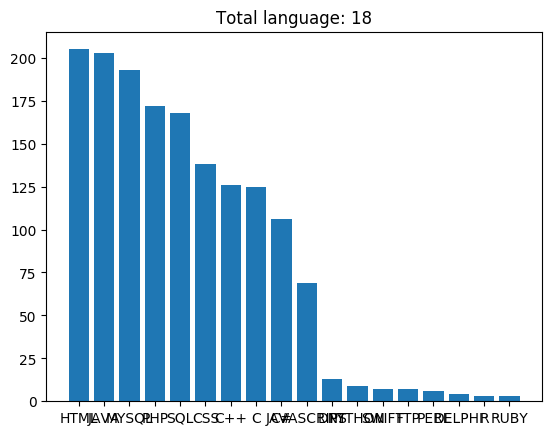

In [40]:
plt.bar(xticks, language.values(), align='center')

plt.xticks(xticks, list(language.keys()))  # 預設 X 座標數字，改顯示水果名
plt.title("Total language: %d" % len(language))  # 給標題
plt.show()  # 秀出圖。不一定需要，例如在 inline 模式就不需要


In [36]:
# """
# ====================
# Horizontal bar chart
# ====================

# This example showcases a simple horizontal bar chart.
# """
# import matplotlib.pyplot as plt
# plt.rcdefaults()
# import numpy as np
# plt.rcdefaults()
# fig, ax = plt.subplots()


# # Example data
# # xticks = np.arange(len(language)) 
# y_pos = np.arange(len(language))
# # performance = 3 + 10 * xticks
# error = language.values
# print(xticks)
# ax.barh(y_pos, language.values, align='center',
#         color='R', ecolor='black')
# ax.set_yticks(y_pos)
# ax.set_yticklabels(language)
# # ax.invert_yaxis()  #
# ax.set_xlabel('language') #x軸的標籤
# ax.set_title('The most popular programming language') #標題

# plt.show()

In [37]:
# #!/usr/bin/env python  
# import numpy.numarray as na
# from pylab import *

# #draw plot
# labels = ["sample1", "sample2", "sample3"]
# size =   [659, 2659, 32384]

# x1 = na.array(range(3))*0.9+0.5
# x2 = na.array(range(3))*0.9+1.0
# x3 = na.array(range(3))*0.9+2.0

# #draw bar
# width = 0.2
# b1 = bar(x1, size, width=width, color = 'c')

# #draw tick
# yticks(range(0,33000,5000))
# xticks(x1+0.1, labels)

# #label Y axis
# ylabel('Y axis', fontsize=12, fontweight='bold')

# xlim(0, x3[1])
# ylim(0,33000)
# title("This is an example to draw the bar chart",fontsize=12, fontweight='bold')
# gca().get_xaxis().tick_bottom()
# gca().get_yaxis().tick_left()

# savefig('bar_chart.png')
# savefig('bar_chart.pdf')
# show()


In [38]:
# print (len(language))

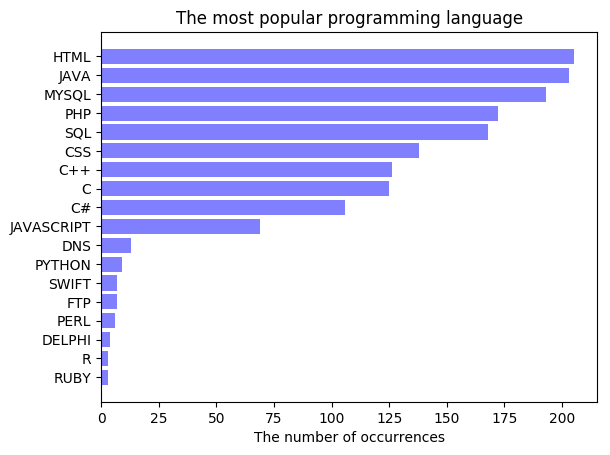

In [39]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(language))
performance = list(language.values())
error = np.random.rand(len(language))

ax.barh(y_pos, performance, align='center',color='#8080ff')
ax.set_yticks(y_pos)
ax.set_yticklabels(language)
ax.invert_yaxis()  
ax.set_xlabel('The number of occurrences')
ax.set_title('The most popular programming language')

plt.show()

In [22]:
# inner_word("https://www.518.com.tw/unity%E5%B7%A5%E7%A8%8B%E5%B8%AB-%E9%AB%98%E9%9B%84%E5%B8%82-%E5%89%8D%E9%8E%AE%E5%8D%80-job-1344470.html?kw=C&pi=1")

In [ ]:
# dict= sorted(static.item(), key=lambda d:d[1], reverse = True)
# print(dict)